# Test Distribution Parameters

Author: M Iotti  
reference: https://lmoments3.readthedocs.io/en/stable/index.html

In [8]:
import os

import numpy as np
import xarray as xr
xr.set_options(display_expand_attrs=False)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
ds_dir = "/ec/vol/centaur/e-obs/6_hourly/"
params_name = "rr_ens_mean_0.1deg_reg_v27.0e_6hourly_GEV_params.nc"
params_path = os.path.join(ds_dir,params_name)
params = xr.open_dataset(params_path)
params

<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 704)
Coordinates:
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.15 45.25 45.35
Data variables:
    k          (latitude, longitude) float32 ...
    sigma      (latitude, longitude) float32 ...
    mu         (latitude, longitude) float32 ...
    l1         (latitude, longitude) float32 ...
    l2         (latitude, longitude) float32 ...
    l3         (latitude, longitude) float32 ...

In [10]:
ds_name = "rr_ens_mean_0.1deg_reg_v27.0e_6hourly_yearmax.nc"
ds_path = os.path.join(ds_dir,ds_name)
ds = xr.open_dataset(ds_path)
ds

<xarray.Dataset>
Dimensions:    (time: 73, bnds: 2, longitude: 704, latitude: 465)
Coordinates:
  * time       (time) datetime64[ns] 1950-07-02T14:00:00 ... 2022-07-02T02:00:00
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.15 45.25 45.35
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tp         (time, latitude, longitude) float32 ...
Attributes: (6)

In [11]:
LAT_idx = 270
LON_idx = 250

par_sel = params.isel(latitude=LAT_idx,longitude=LON_idx)
ds_sel = ds.isel(latitude=LAT_idx,longitude=LON_idx)

In [12]:
k, sigma, mu = par_sel.k.values, par_sel.sigma.values, par_sel.mu.values
print(k,sigma,mu)

0.07825235 4.456708 17.65263


In [13]:
from lmoments3 import distr

test_params = distr.gev.lmom_fit(ds_sel['tp'].values)
print(test_params)

OrderedDict([('c', 0.07785636622043317), ('loc', 17.651817930982894), ('scale', 4.455298154737635)])


## Plot

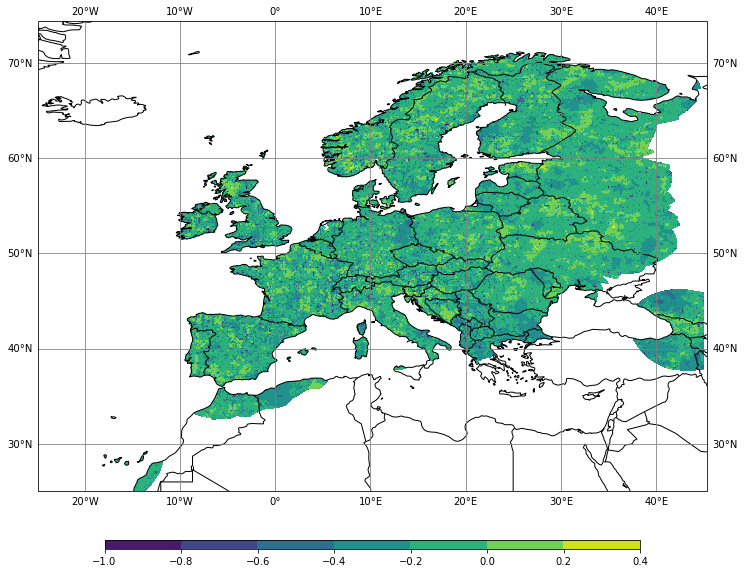

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(12,12))

lons = params['longitude'].values
lats = params['latitude'].values

cplot = ax.contourf(lons,
                    lats,
                    params['k'].values,
                    transform=ccrs.PlateCarree())

ax.set_extent((lons[0],lons[-1],lats[0],lats[-1]))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
gl=ax.gridlines(linestyle='-',color='gray',draw_labels=True)

fig.colorbar(cplot,ax=ax,orientation='horizontal',
             shrink=0.8,aspect=60,pad=0.075,ticks=None)